# Noteboook for High Frequency SSVEP 
Jimmy Pulido Arias 

In [3]:
!pip install mne

'pip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [98]:
# Import libraries
import os
import sys
import numpy as np 
import seaborn  as sns 
import pandas as pd 
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)

In [29]:
import mne
import numpy as np 

np.array([30,250])

ch_names = mne.channels.make_standard_montage('biosemi32').ch_names 
sfreq = 512 
ch_types = "eeg"
info = mne.create_info(ch_names, sfreq, ch_types)
raw = mne.io.RawArray(np.zeros([32,512]), info = info)

Creating RawArray with float64 data, n_channels=32, n_times=512
    Range : 0 ... 511 =      0.000 ...     0.998 secs
Ready.


In [30]:
raw.notch_filter([60], filter_length='auto', phase='zero')
raw.set_eeg_reference(['Cz'])
raw.pick_channels(['O1', 'O2', 'Oz', 'PO3', 'PO4'])

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3381 samples (6.604 s)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\CNELAB_Acq\AppData\Local\Temp\ipykernel_17556\4124015285.py:1: RuntimeWarning: filter_length (3381) is longer than the signal (512), distortion is likely. Reduce filter length or filter a longer signal.
  raw.notch_filter([60], filter_length='auto', phase='zero')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawArray | 5 x 512 (1.0 s), ~29 kB, data loaded>

In [32]:
raw.get_data().shape

(5, 512)

In [13]:
np.zeros([30,250]).shape

(30, 250)

## Read Data 

In [139]:
from eegtools.eegprocessor import EEGProcessor
from eegtools.fbcca import FBCCA
from eegtools.psd import PSDAnalyzer

stimuli_ids = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"] 
frequencies = [32.5, 34.0, 31.5, 35.5, 34.5, 30.0, 33.5, 30.5, 32.0, 35.0, 31.0, 33.0]

In [175]:
stimuli_time = 5
delay = 0

eegdf = EEGProcessor(path="arim_3x4_high.bdf", stimuli_ids = stimuli_ids, 
            root="/home/cnelab-workstation/jimmy/SSVEP_highfrequency/neflix_experiment/data/", stimuli_time=5, delay=0)

eegdf.preprocess_eeg(pick_channels=EEGProcessor._channels_o, l_freq=0.1, h_freq=200, ch_reference = 'Cz')

eegdf.get_epochs()

Extracting EDF parameters from /home/cnelab-workstation/jimmy/SSVEP_highfrequency/neflix_experiment/data/arim_3x4_high.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3368959  =      0.000 ...  1645.000 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['0', '1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9']
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff

Number of events,120
Events,0: 101: 1010: 1011: 102: 103: 104: 105: 106: 107: 108: 109: 10
Time range,0.000 – 5.000 s
Baseline,0.000 – 0.000 s


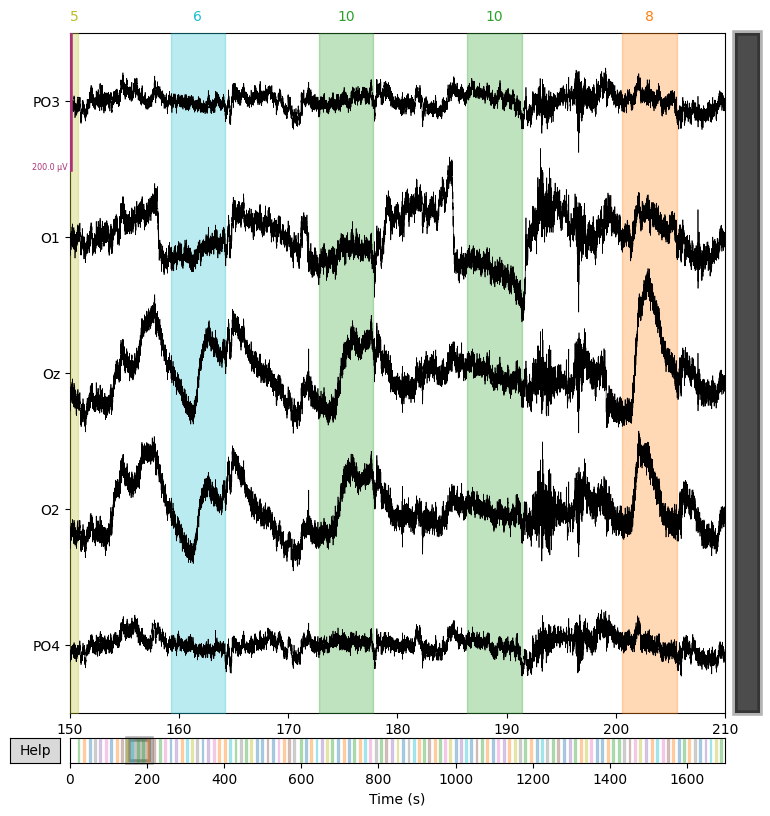

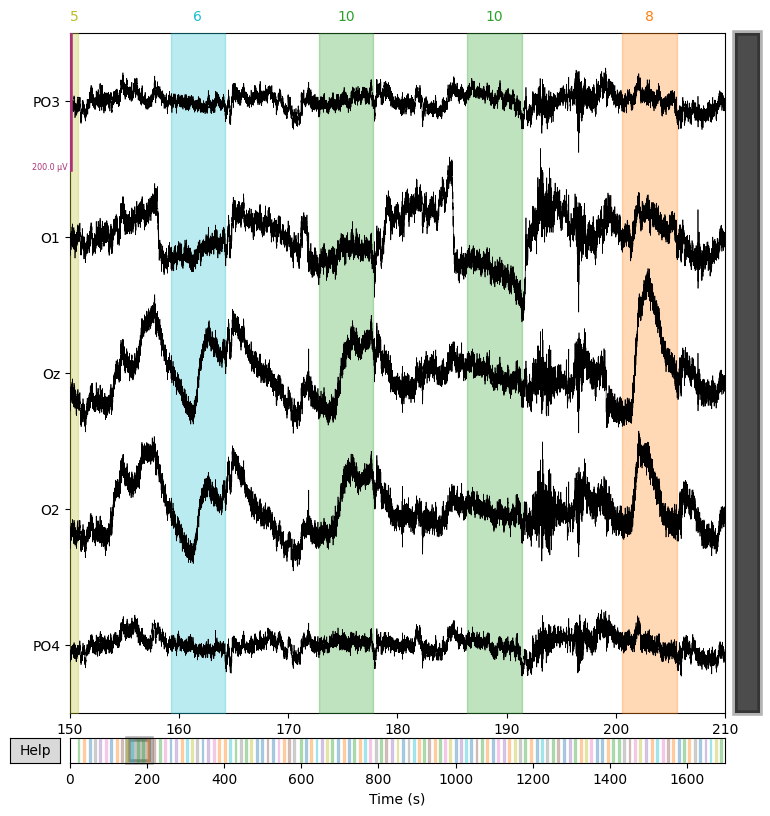

In [141]:
eegdf.raw.plot(start=150, duration=60, scalings=0.0001)

# PSD

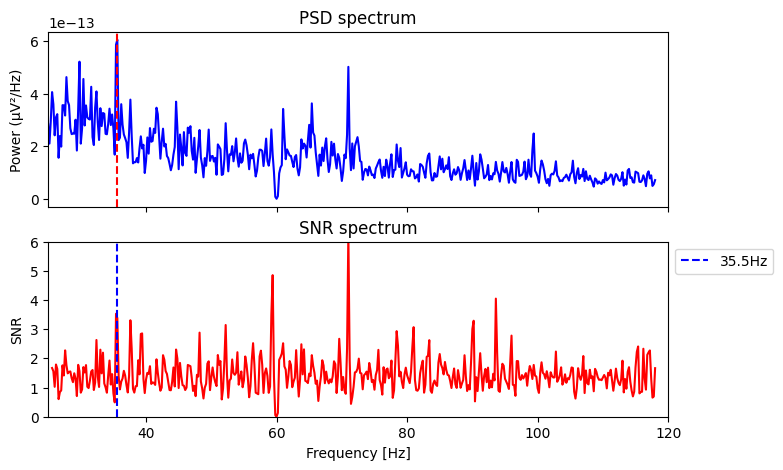

In [179]:
analyzer = PSDAnalyzer(frequencies=frequencies)
psds, freqs, snrs = analyzer.calculate_psd_snr(eegdf.epochs["3"], frequencies)
analyzer.plot_psd_snr(psds, freqs, snrs, frequencies[3], "file_name")

In [144]:
n_seconds = 3
time = np.linspace(0, n_seconds,int(n_seconds * 512) ,
                   endpoint=False)[np.newaxis, :]

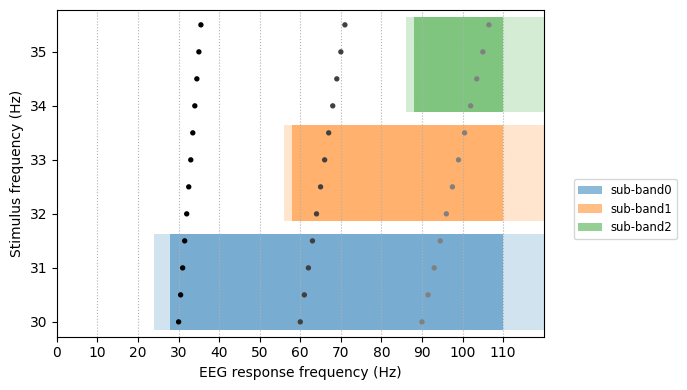

In [145]:
filterbank = [
              [(28, 110), (24, 120)], 
              [(58, 110), (56, 120)],
              [(88, 110), (86, 120)],              ]


f, ax = plt.subplots(1, figsize=(7, 4))
for i, _band in enumerate(filterbank):
    ax.axvspan(ymin=i / len(filterbank) + .02,
               ymax=(i + 1) / len(filterbank) - .02,
               xmin=filterbank[i][1][0], xmax=filterbank[i][1][1],
               alpha=0.2, facecolor=f"C{i}")
    ax.axvspan(ymin=i / len(filterbank) + .02,
               ymax=(i + 1) / len(filterbank) - .02,
               xmin=filterbank[i][0][0], xmax=filterbank[i][0][1],
               alpha=0.5, label=f"sub-band{i}", facecolor=f"C{i}")

for f in frequencies:
    colors = np.ones((3, 4))
    colors[:, :3] = np.linspace(0, .5, 3)[:, None]
    ax.scatter(f * np.arange(1, 4), [f] * 3, c=colors, s=8, zorder=100)

ax.set_ylabel("Stimulus frequency (Hz)")
ax.set_xlabel("EEG response frequency (Hz)")
ax.set_xlim([0, 120])
ax.set_xticks(np.arange(0, 120, 10))
ax.grid(True, ls=":", axis="x")
ax.legend(bbox_to_anchor=(1.05, .5), fontsize="small")
plt.tight_layout()
plt.show()

# FBCCA

In [180]:
# FBCCA individual
import warnings
import multiprocessing
from concurrent.futures import ProcessPoolExecutor, as_completed


def process_window(w, fs, samples, eegdf, frequencies, fbcca_model):
        print(w)
        n_win = w
        n_samples = int(fs * n_win) 
        p = int(samples / n_samples)
        one_epoch = eegdf.epochs.copy()
        y, y_pred = [], [] 
        Rho = [] 
        for i in range(12): 
            X = one_epoch["{}".format(i)].get_data()
            X = X[:,:,:n_samples]
            print("{}: =============================================".format(i))
            pred, rho = fbcca_model.fbcca(X, frequencies, fs)
            
            y += [i] * len(pred)
            y_pred += pred
            Rho.append(rho)
        return w, y, y_pred, Rho

def run_fbcca_analysis(win_sizes, fs, eegdf, frequencies, fbcca_model):
    warnings.filterwarnings('ignore') 
    eegdf.epochs.resample(sfreq=512.0)
    samples = fs * win
    results = {}

    num_cores = multiprocessing.cpu_count()
    with ProcessPoolExecutor(max_workers=num_cores) as executor:
        futures = [executor.submit(process_window, w, fs, samples, eegdf, frequencies, fbcca_model) for w in win_sizes]
        
        for future in as_completed(futures):
            w, y, y_pred, Rho = future.result()
            results[w] = {
                "y": y,
                "y_pred": y_pred,
                "Rho": Rho
            }
    
    return results

In [182]:
win_sizes = [5]
fs = eegdf.epochs.info["sfreq"]

fbcca_model = FBCCA(num_harms=2, num_fbs=2, a=1.25, b=0.25)

results = run_fbcca_analysis([5], fs, eegdf, frequencies, fbcca_model)

Sampling frequency of the instance is already 512.0, returning unmodified.
5
0: =============================================
1: =============================================
2: =============================================
3: =============================================
4: =============================================
5: =============================================
6: =============================================
7: =============================================
8: =============================================
9: =============================================
10: =============================================
11: =============================================


In [183]:
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import classification_report
accuracy_windowsize = [] 
for w in win_sizes:
    y, y_pred, Rho = results[w]["y"], results[w]["y_pred"], results[w]["Rho"]
    print(classification_report(y, y_pred, labels=[0,1,2,3,4,6,7,8,9,10,11]) )
    print(top_k_accuracy_score(y, np.array
    (Rho).reshape(len(y_pred),12) , k=2))
    accuracy_windowsize.append(top_k_accuracy_score(y, np.array(Rho).reshape(len(y_pred),12) , k=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.70      0.82        10
           2       0.89      0.80      0.84        10
           3       0.86      0.60      0.71        10
           4       0.88      0.70      0.78        10
           6       0.78      0.70      0.74        10
           7       0.69      0.90      0.78        10
           8       0.67      1.00      0.80        10
           9       0.73      0.80      0.76        10
          10       0.71      1.00      0.83        10
          11       0.90      0.90      0.90        10

   micro avg       0.81      0.83      0.82       110
   macro avg       0.83      0.83      0.81       110
weighted avg       0.83      0.83      0.81       110

0.9


<Axes: >

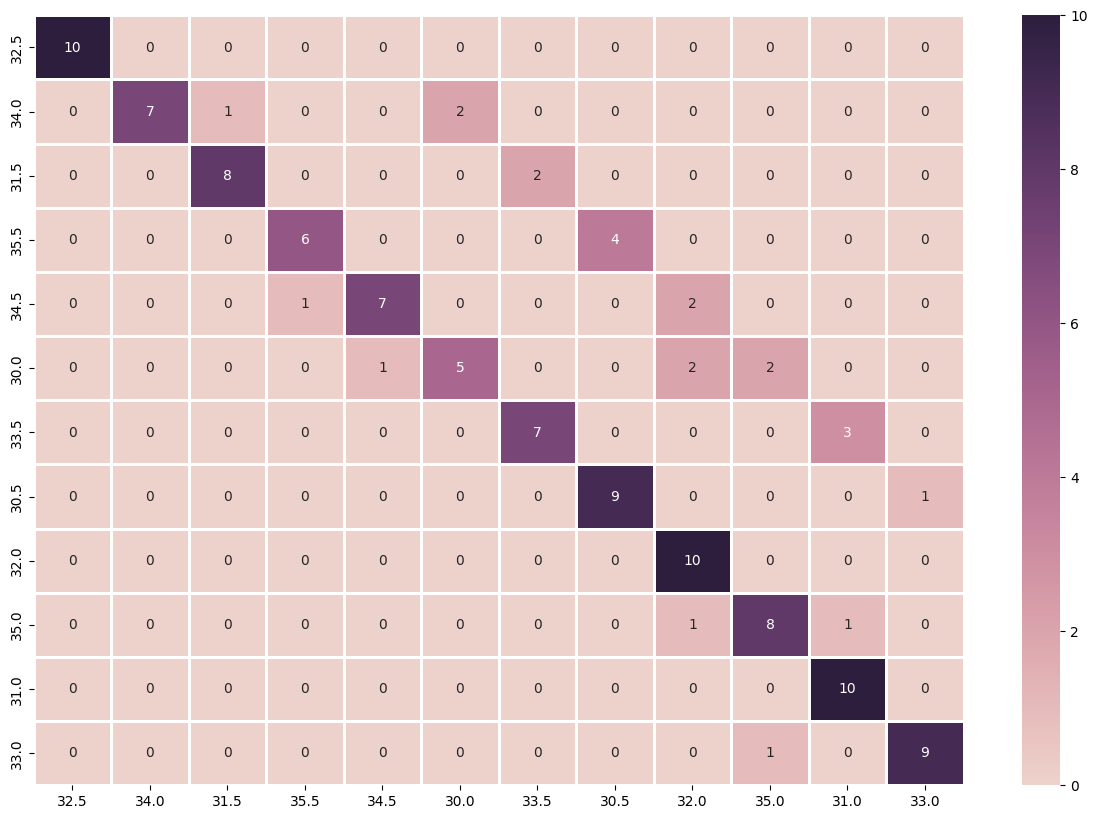

In [184]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y,y_pred)

fig, ax = plt.subplots(figsize=(15,10)) 

sns.heatmap(cf_matrix, linewidths=1, xticklabels= frequencies, yticklabels = frequencies,
 annot=True, ax=ax, fmt='g', cmap=sns.cubehelix_palette(as_cmap=True))

<Axes: >

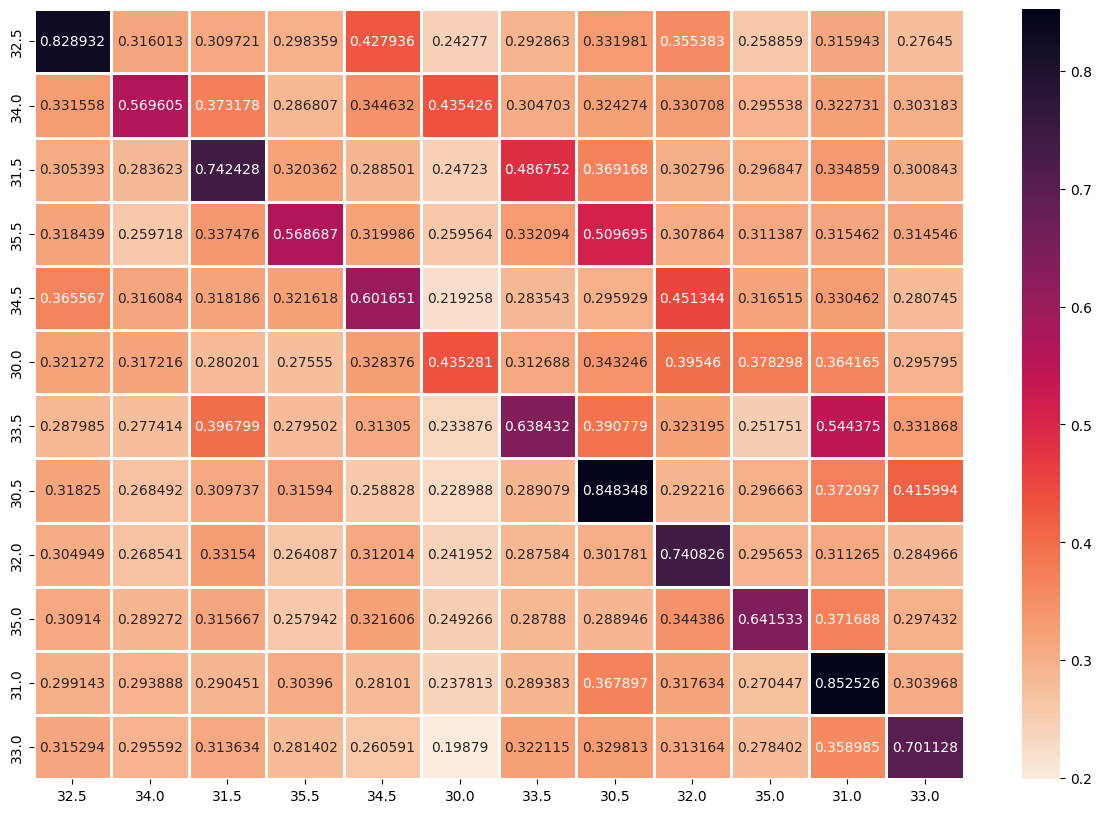

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline
y, y_pred, Rho = results[5]["y"], results[5]["y_pred"],results[5]["Rho"]
#print(classification_report(y,y_pred))
correlation_heatmap = np.array(Rho).mean(axis=1)

fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(correlation_heatmap, linewidths=1, xticklabels= frequencies, yticklabels = frequencies, annot=True, ax=ax, fmt='g', cmap=sns.color_palette("rocket_r", as_cmap=True))

#fig.savefig(f"CCA{file_names[0]}", bbox_inches='tight')